In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
#load in cleaned data
df = pd.read_csv('cleaned_train_EGN5442.csv')
df.head()

,y,x2,x3,x5,x9,x10,x11,x12,x13,x14,...,x20,x21,x22,x23,x24,x25,x26,x28,x29,x6
0,1,54359.0,0,50,5,5,5,4,3,5.0,...,3,4,3,21,12.0,0,0,1,192.0,50
1,1,84649.0,0,44,1,1,1,1,3,3.0,...,4,4,2,0,0.0,1,0,1,1034.0,44
2,0,59015.0,0,72,3,1,5,5,3,2.0,...,1,3,2,0,8.0,1,0,3,1452.0,72
3,0,99990.0,0,38,1,3,1,3,5,1.0,...,1,4,5,0,0.0,1,1,3,916.0,38
4,1,83569.0,1,37,5,5,5,5,2,5.0,...,4,4,5,0,0.0,1,0,1,390.0,37


In [13]:
#Now we need to do some data exploration to understand the dataset
df.info(), df.describe(), df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101947 entries, 0 to 101946
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   y       101947 non-null  int64  
 1   x2      101947 non-null  float64
 2   x3      101947 non-null  int64  
 3   x5      101947 non-null  int64  
 4   x9      101947 non-null  int64  
 5   x10     101947 non-null  int64  
 6   x11     101947 non-null  int64  
 7   x12     101947 non-null  int64  
 8   x13     101947 non-null  int64  
 9   x14     101947 non-null  float64
 10  x15     101947 non-null  int64  
 11  x16     101947 non-null  int64  
 12  x17     101947 non-null  int64  
 13  x18     101947 non-null  int64  
 14  x19     101947 non-null  int64  
 15  x20     101947 non-null  int64  
 16  x21     101947 non-null  int64  
 17  x22     101947 non-null  int64  
 18  x23     101947 non-null  int64  
 19  x24     101947 non-null  float64
 20  x25     101947 non-null  int64  
 21  x26     10

(None,
                    y             x2             x3             x5  \
 count  101947.000000  101947.000000  101947.000000  101947.000000   
 mean        0.428497   51951.775393       0.491187      39.434775   
 std         0.494863   30001.255165       0.499925      15.148666   
 min         0.000000       0.000000       0.000000       7.000000   
 25%         0.000000   25955.500000       0.000000      27.000000   
 50%         0.000000   51959.000000       0.000000      40.000000   
 75%         1.000000   77929.500000       1.000000      51.000000   
 max         1.000000  103903.000000       1.000000      85.000000   
 
                   x9            x10            x11            x12  \
 count  101947.000000  101947.000000  101947.000000  101947.000000   
 mean        2.769723       3.074755       2.820260       2.979999   
 std         1.298744       1.509045       1.347782       1.279256   
 min         0.000000       0.000000       0.000000       0.000000   
 25%       

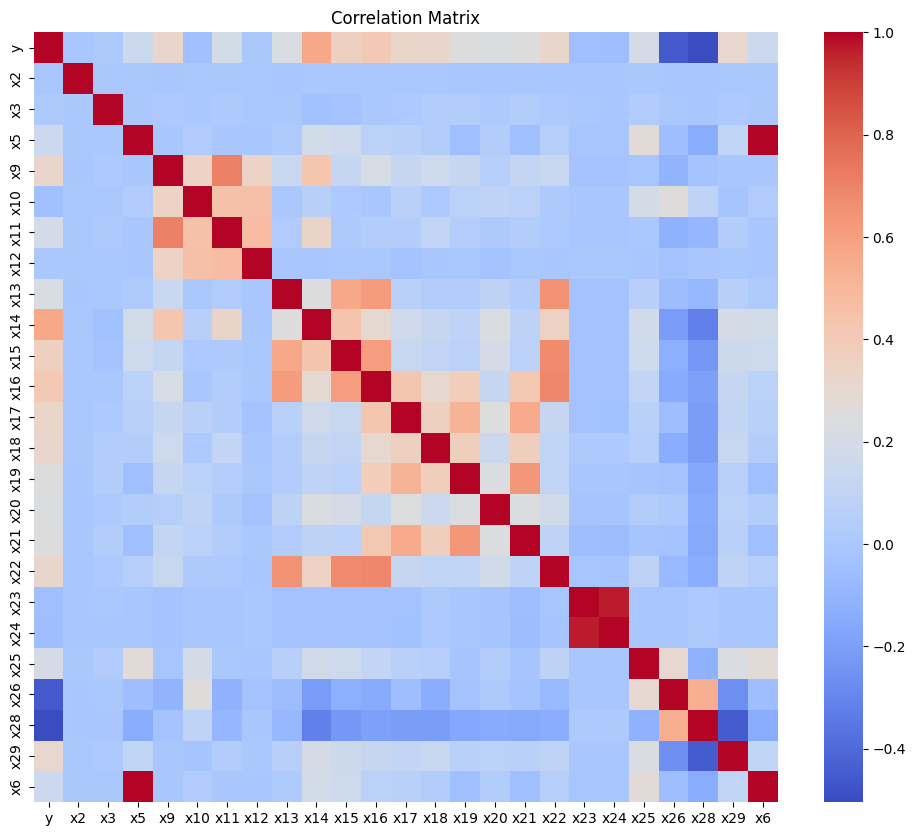

In [14]:
#look for correlations
corr = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

It turns out that x5 and x6 are duplicates, so lets drop x6.

In [15]:
#drop column x6 since it is a duplicate of x5
df = df.drop(columns=['x6'])
#save cleaned data without x6
df.to_csv('cleaned_train_EGN5442_v2.csv', index=False)

In [16]:
#Which columns are binary?
binary_cols = [col for col in df.columns if df[col].nunique() == 2]
print("Binary Columns:", binary_cols)
#Which columns are continuous?
continuous_cols = [col for col in df.columns if df[col].nunique() > 6 and col != 'y']
print("Continuous Columns:", continuous_cols)
#discrete columns
discrete_cols = [col for col in df.columns if 2 < df[col].nunique() <= 6]
print("Discrete Columns:", discrete_cols)

Binary Columns: ['y', 'x3', 'x25', 'x26']
Continuous Columns: ['x2', 'x5', 'x23', 'x24', 'x29']
Discrete Columns: ['x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x28']


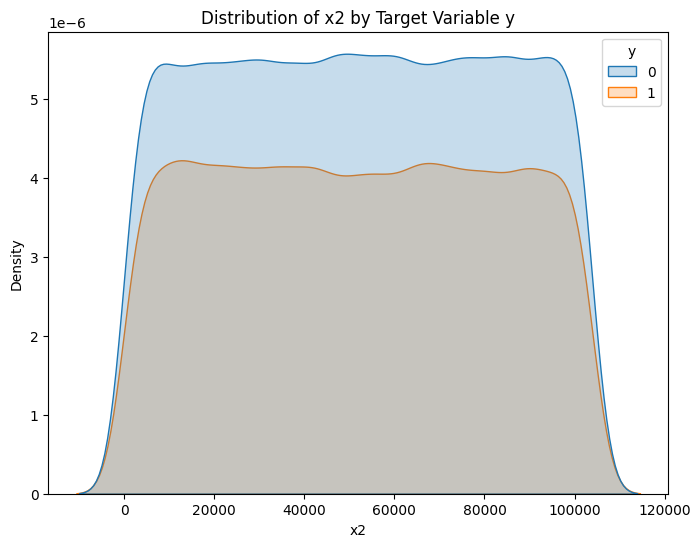

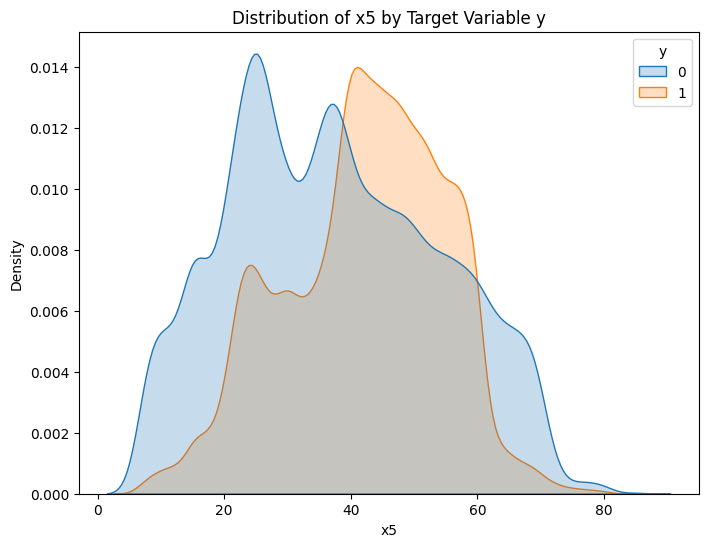

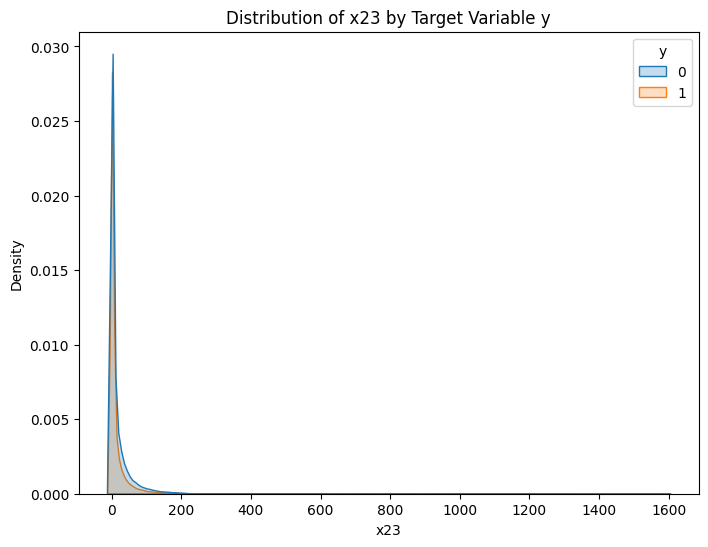

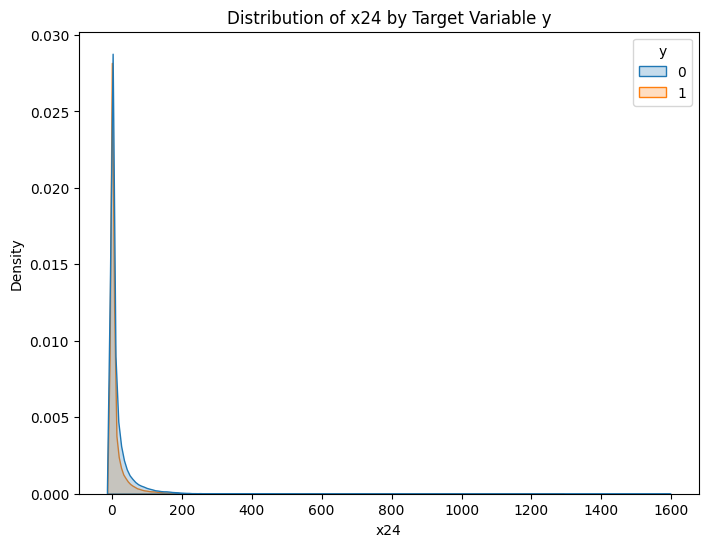

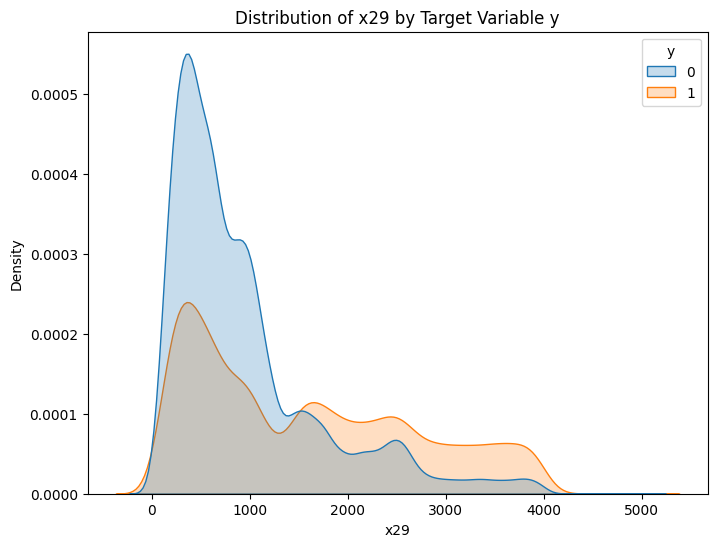

In [17]:
# make some plots to visualize data distributions, where the hue is the target variable 'y'
for col in continuous_cols:
    plt.figure(figsize=(8,6))
    sns.kdeplot(data=df, x=col, hue='y', fill=True)
    plt.title(f'Distribution of {col} by Target Variable y')
    plt.show()

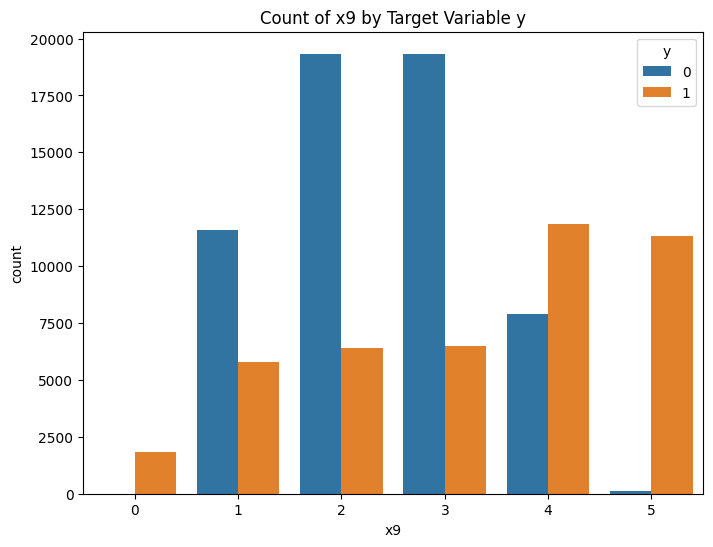

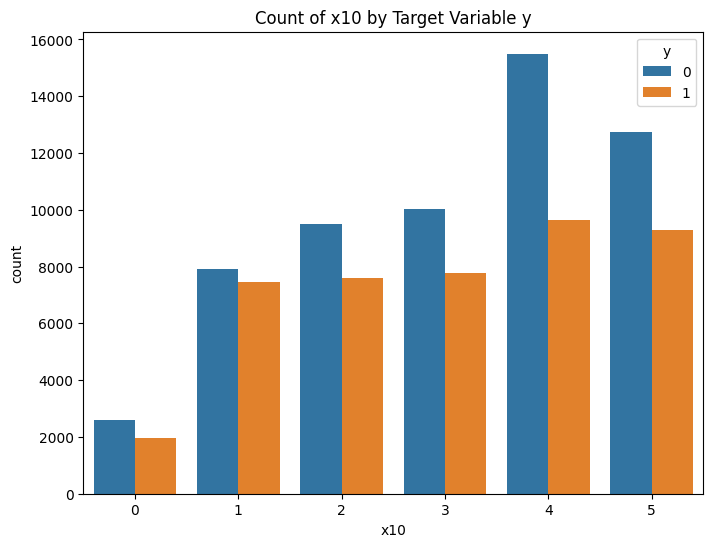

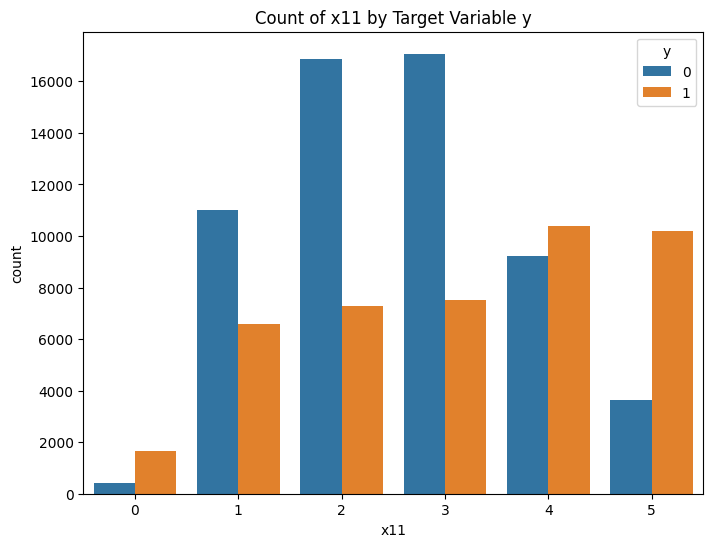

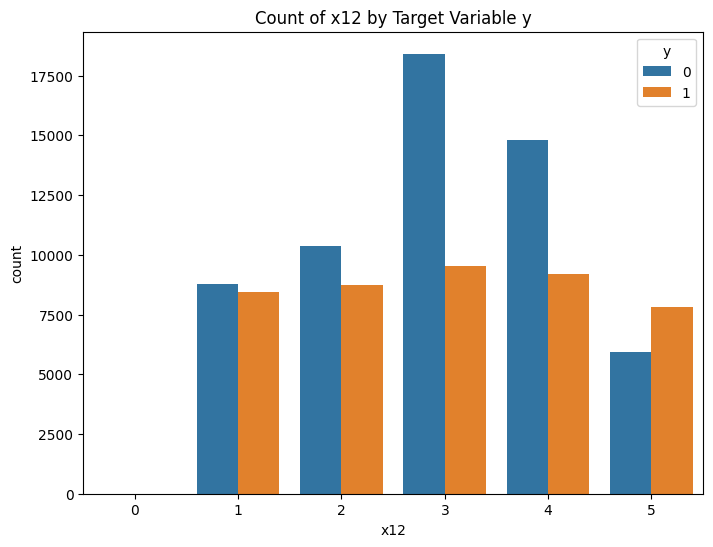

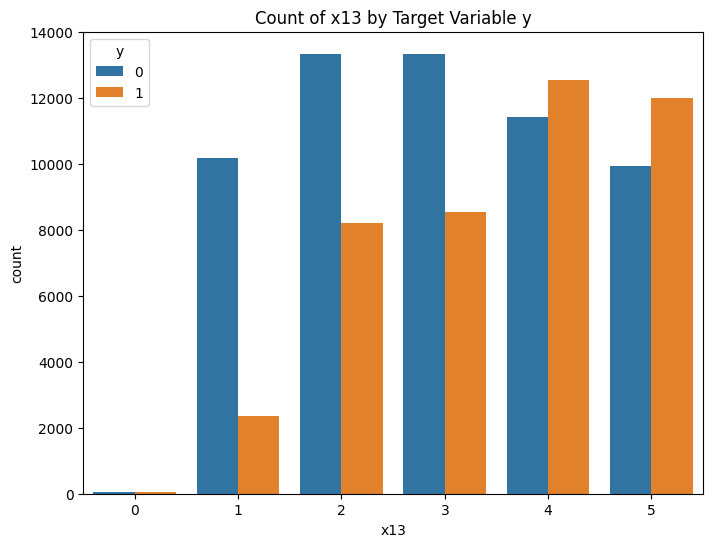

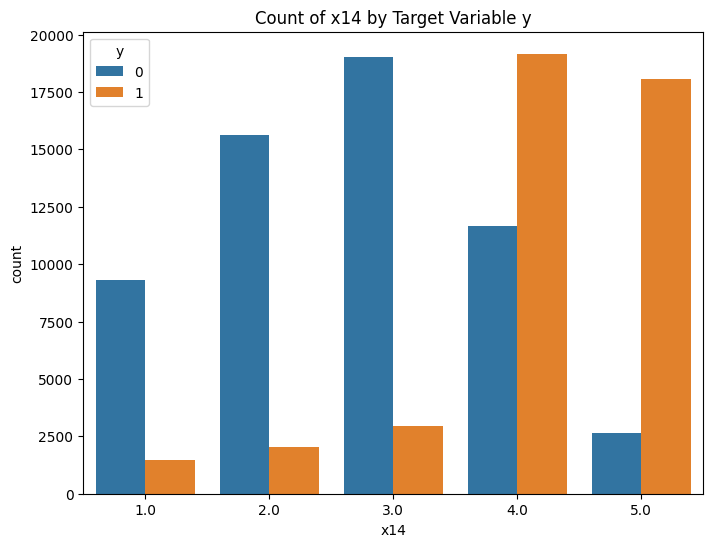

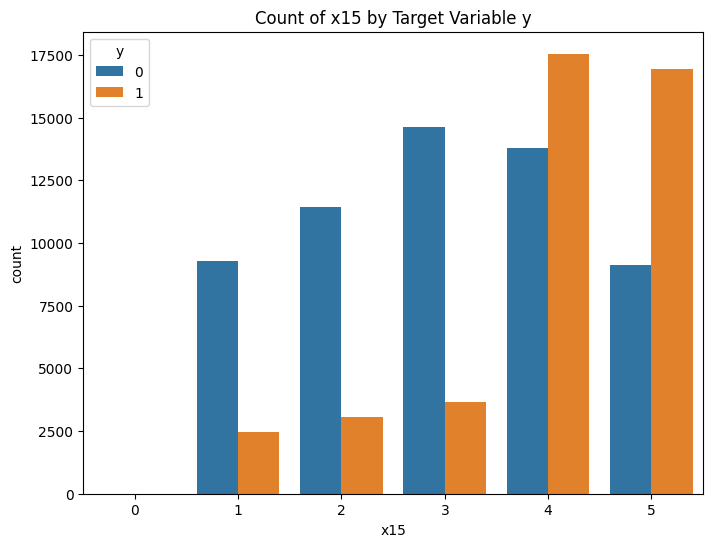

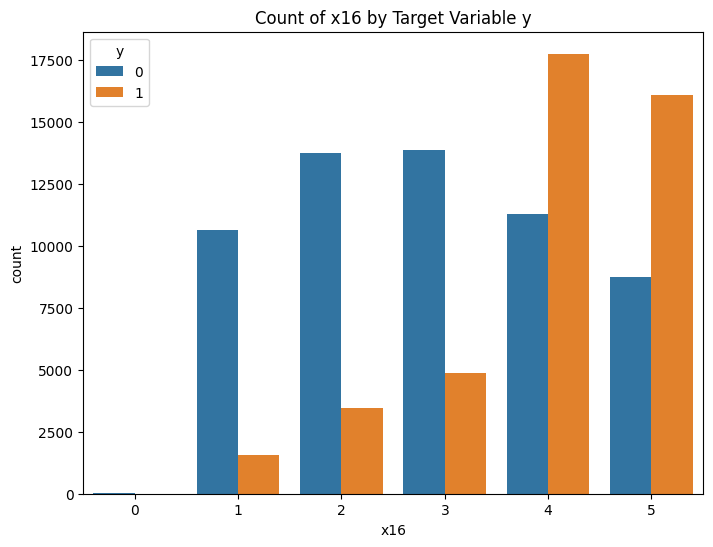

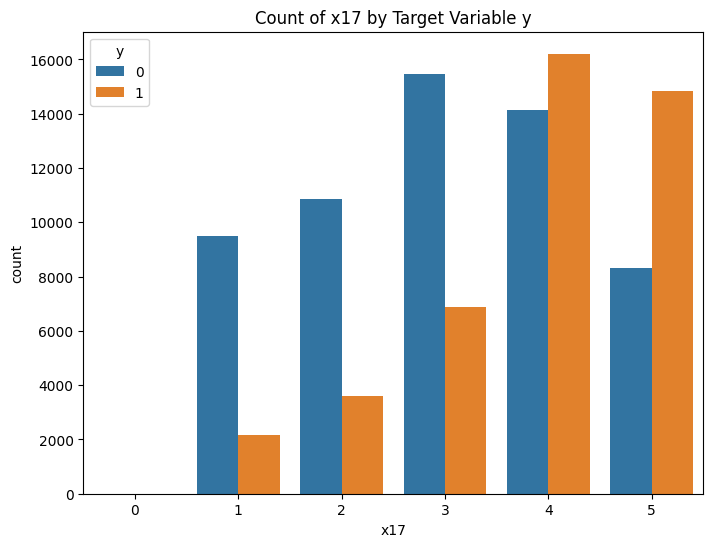

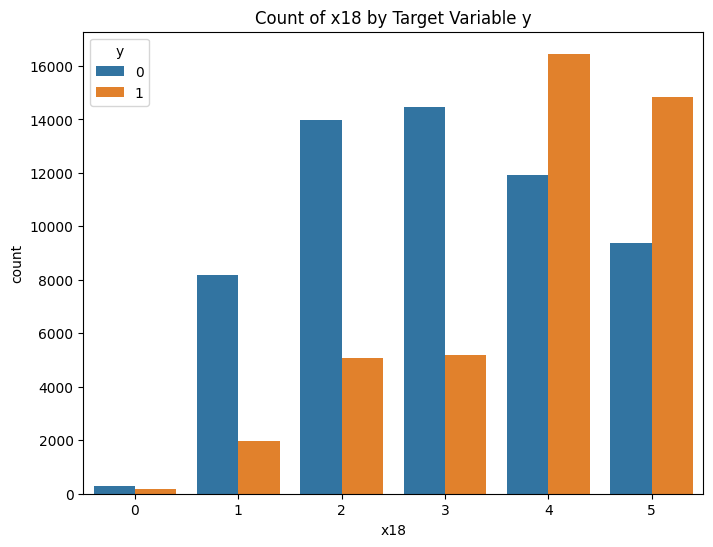

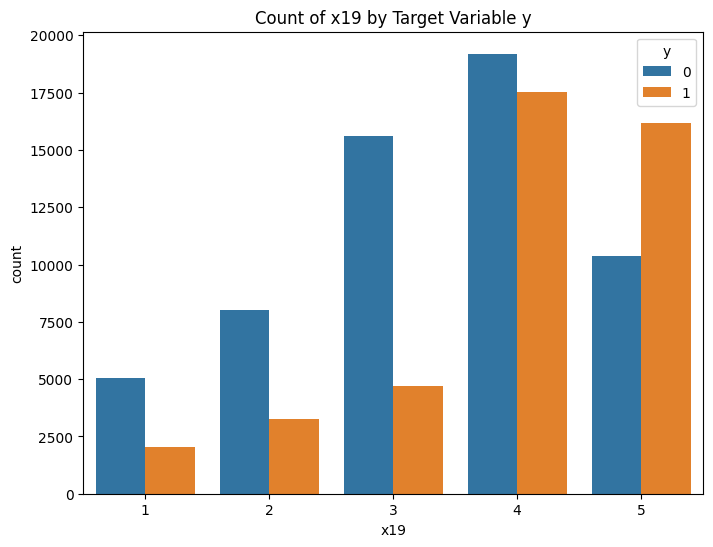

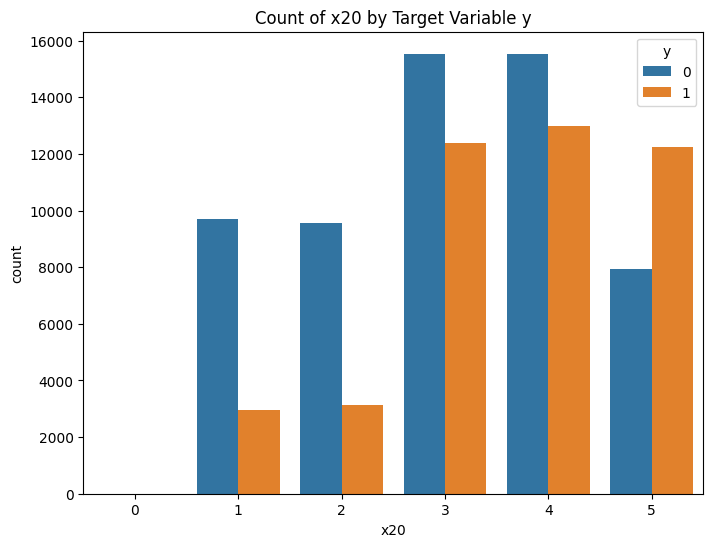

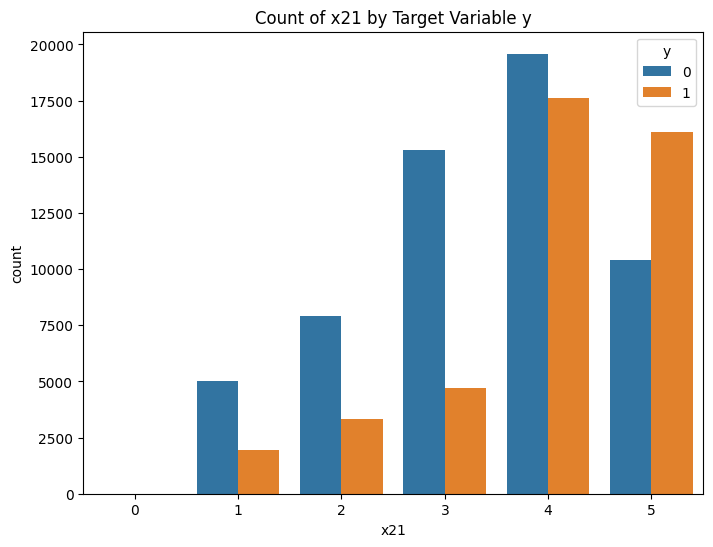

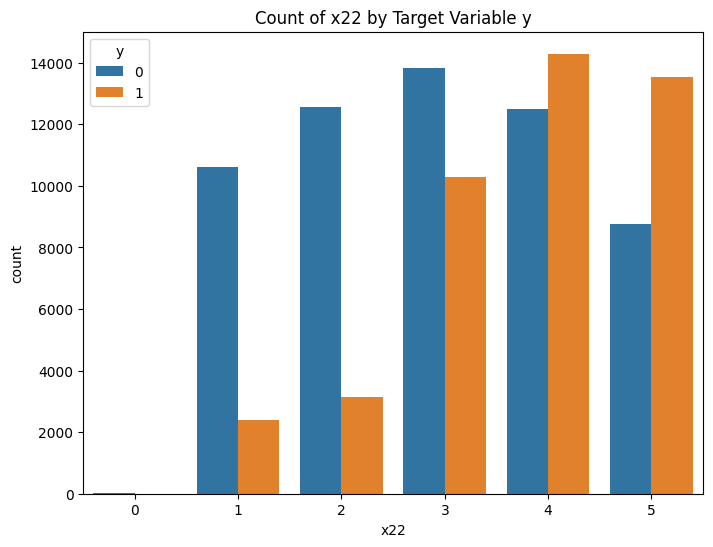

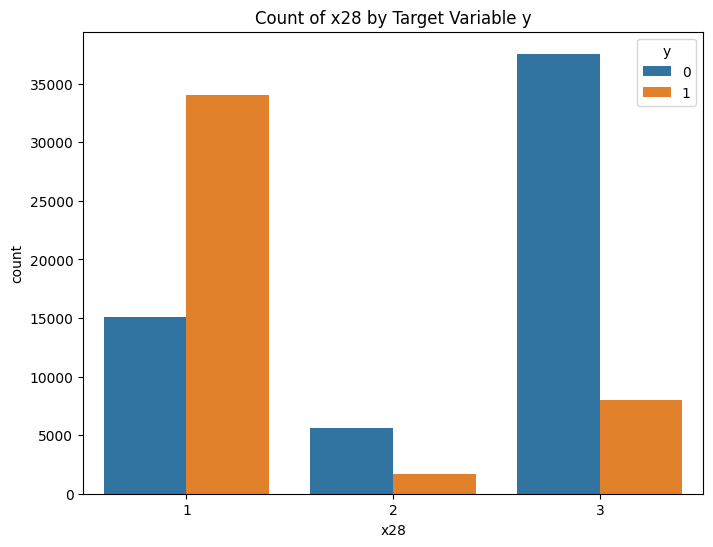

In [8]:
# make a series of plots that are countplots for discrete columns to show counts by target variable
for col in discrete_cols:
    plt.figure(figsize=(8,6))
    sns.countplot(data=df, x=col, hue='y')
    plt.title(f'Count of {col} by Target Variable y')
    plt.show()

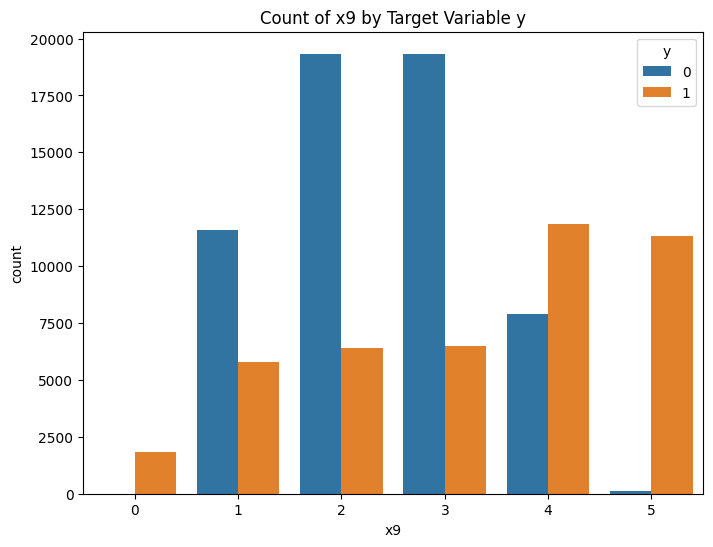

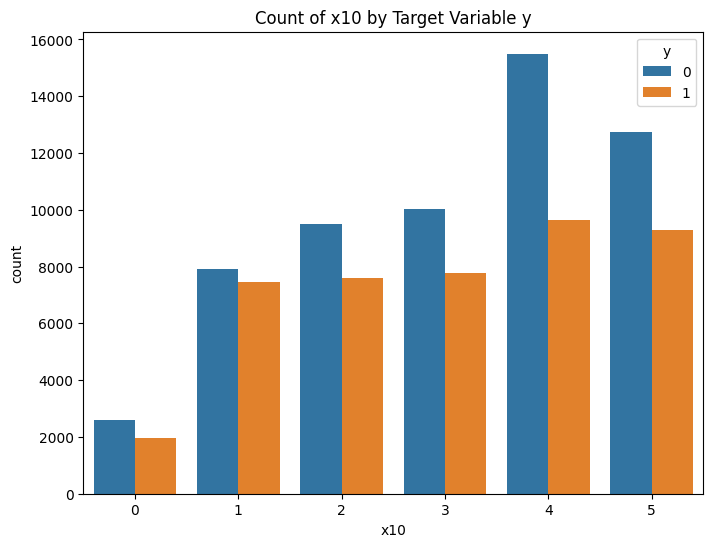

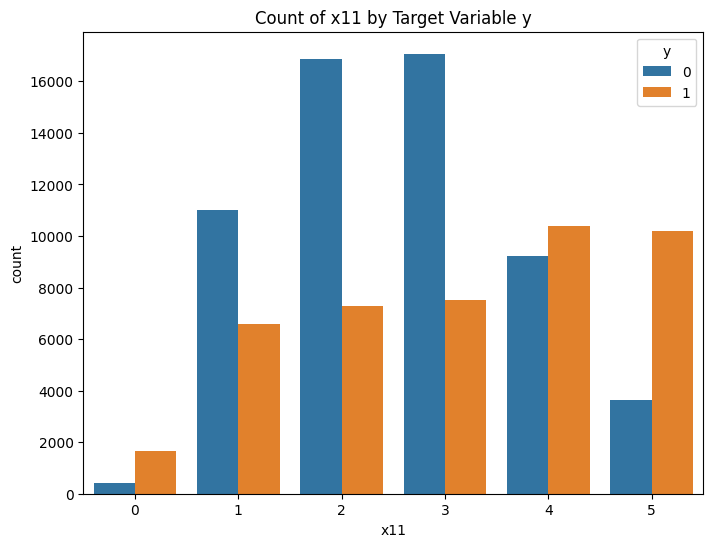

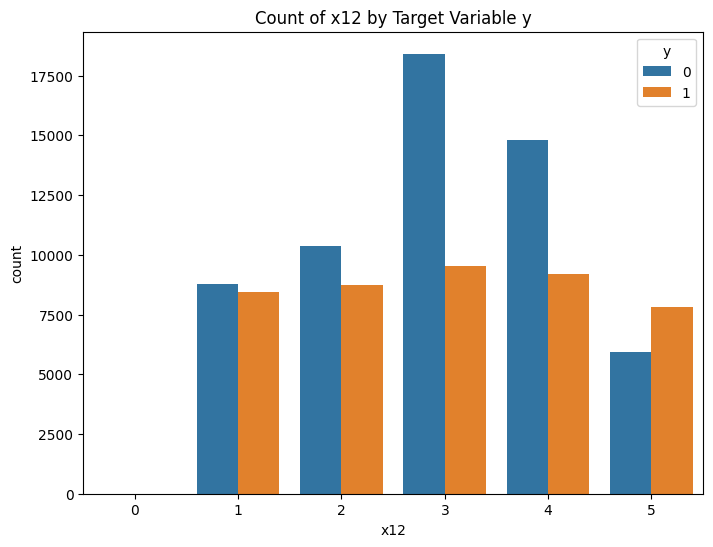

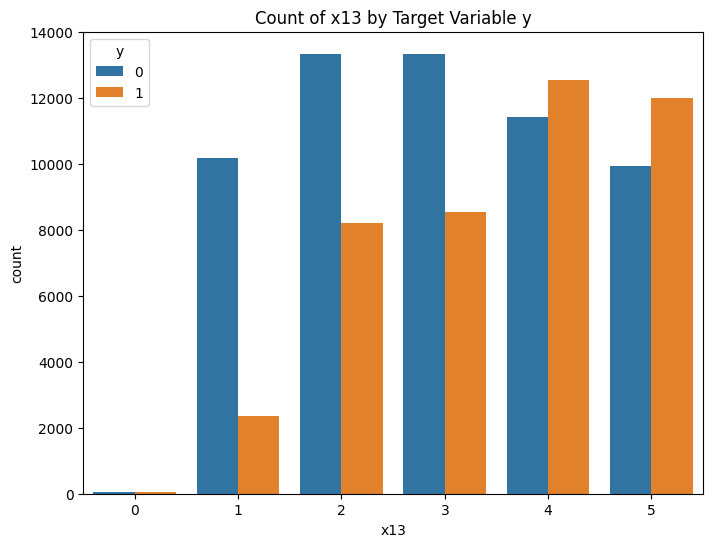

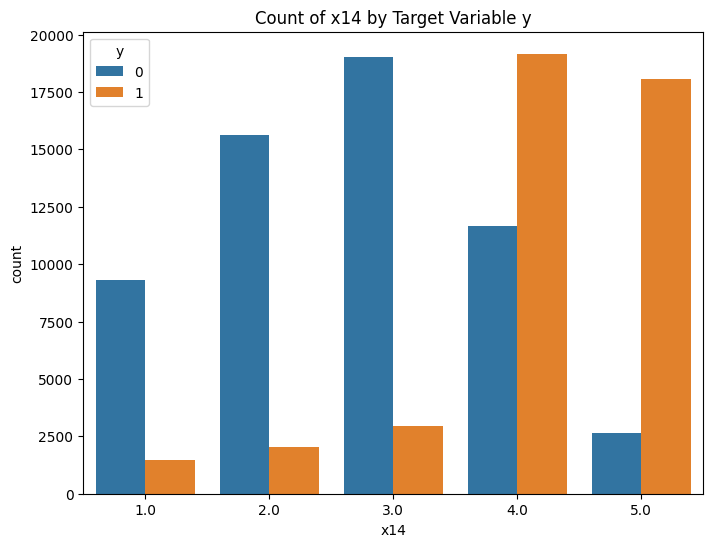

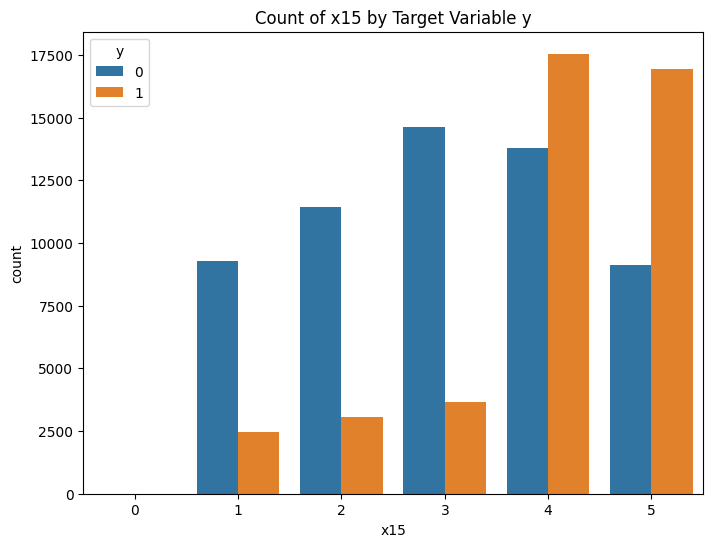

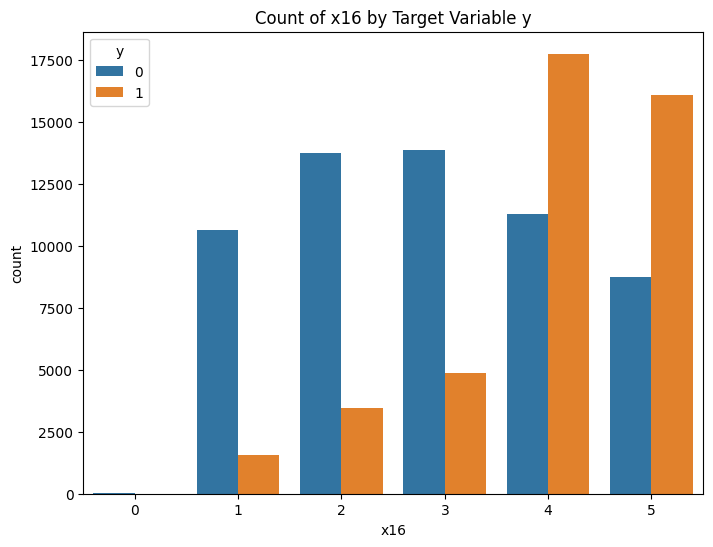

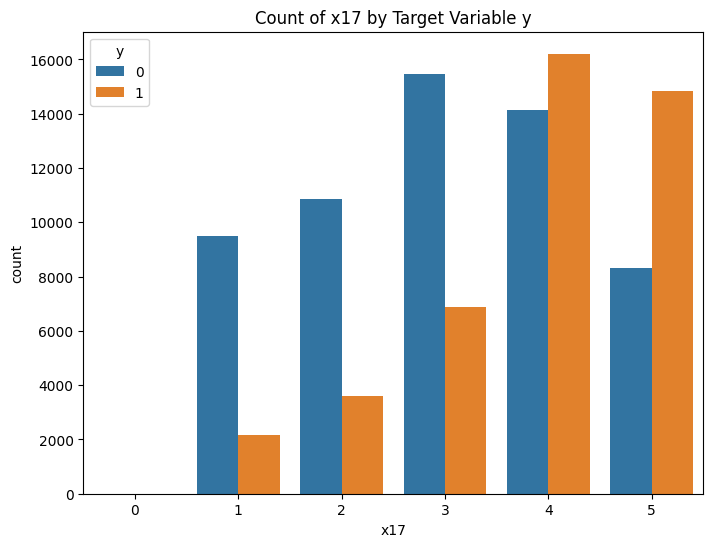

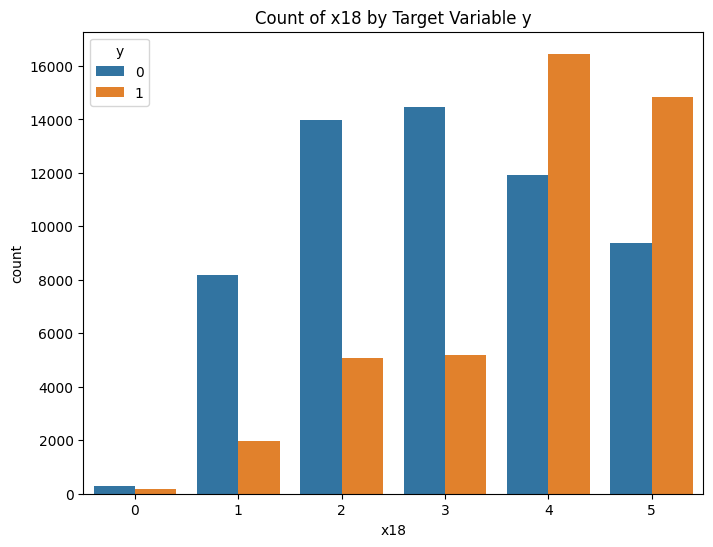

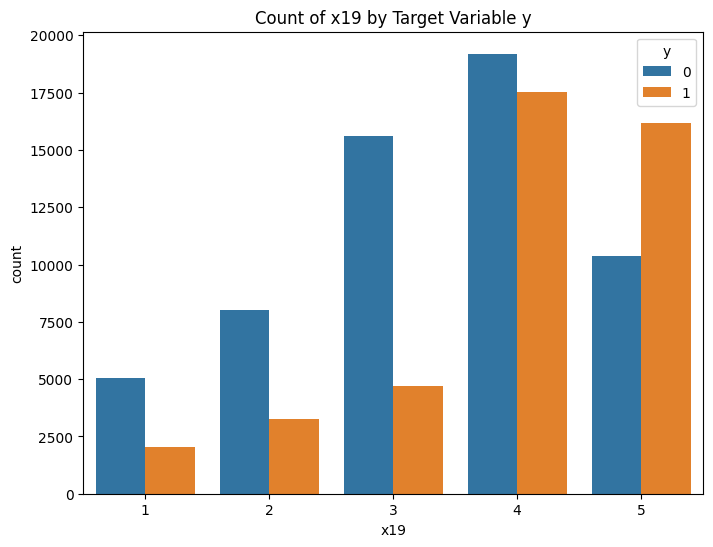

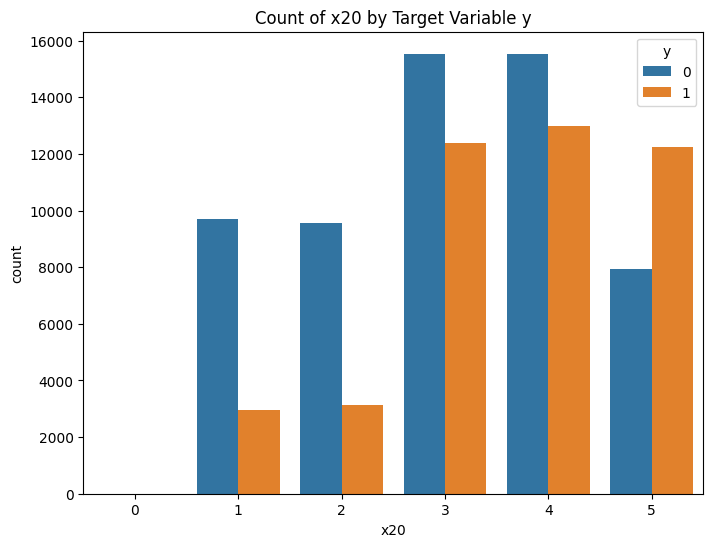

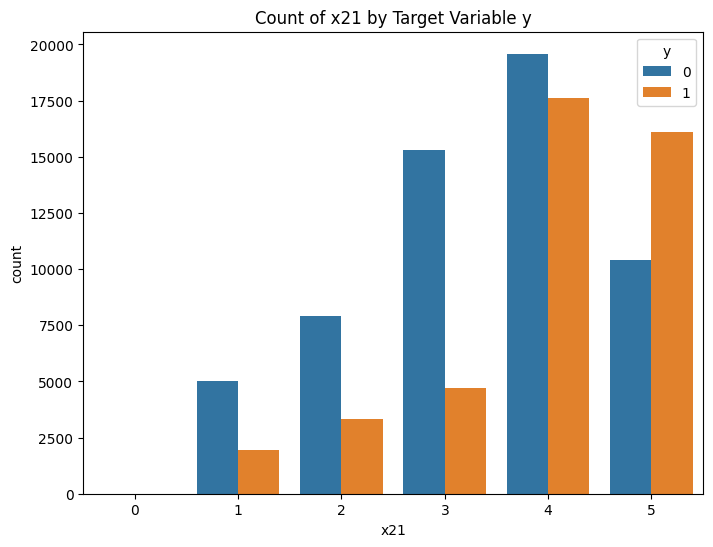

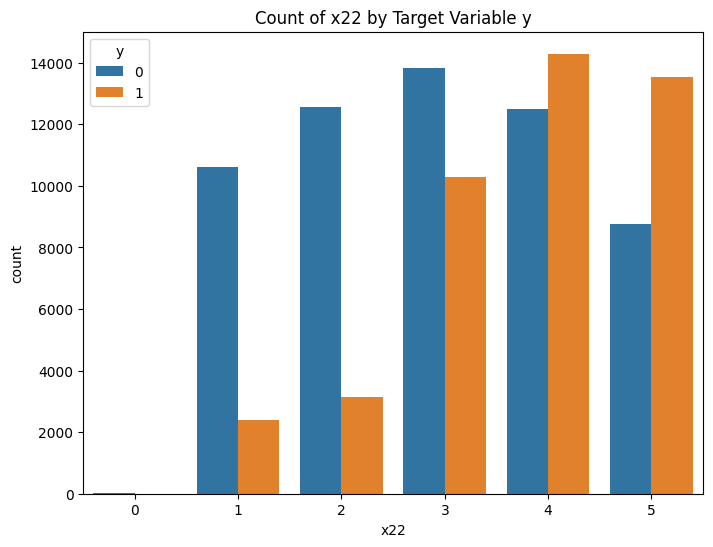

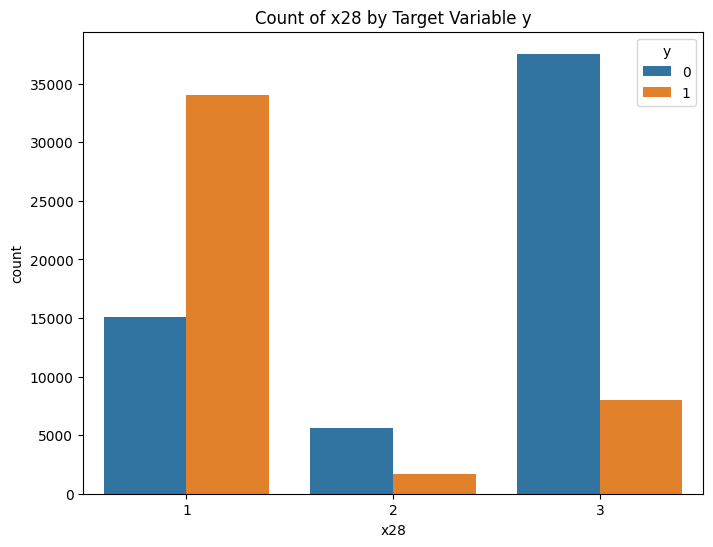

In [9]:
# make a series of plots for discrete columns to show counts by target variable
for col in discrete_cols:
    plt.figure(figsize=(8,6))
    sns.countplot(data=df, x=col, hue='y')
    plt.title(f'Count of {col} by Target Variable y')
    plt.show()

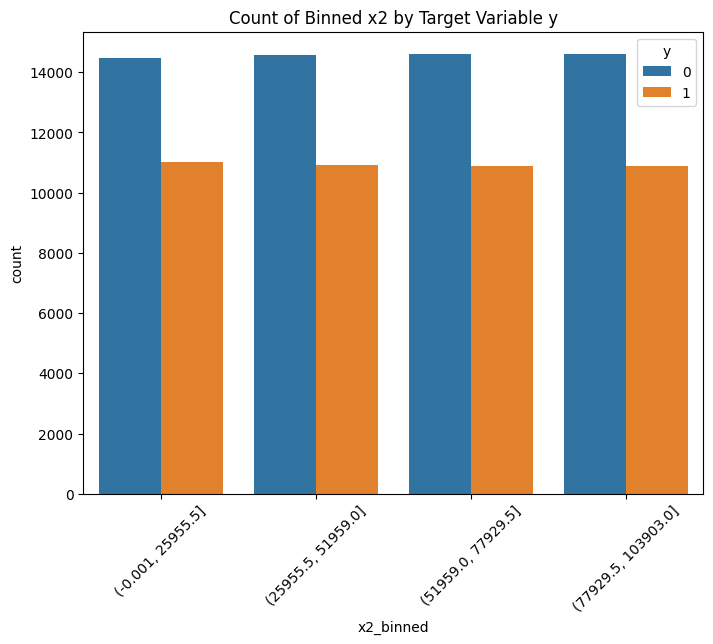

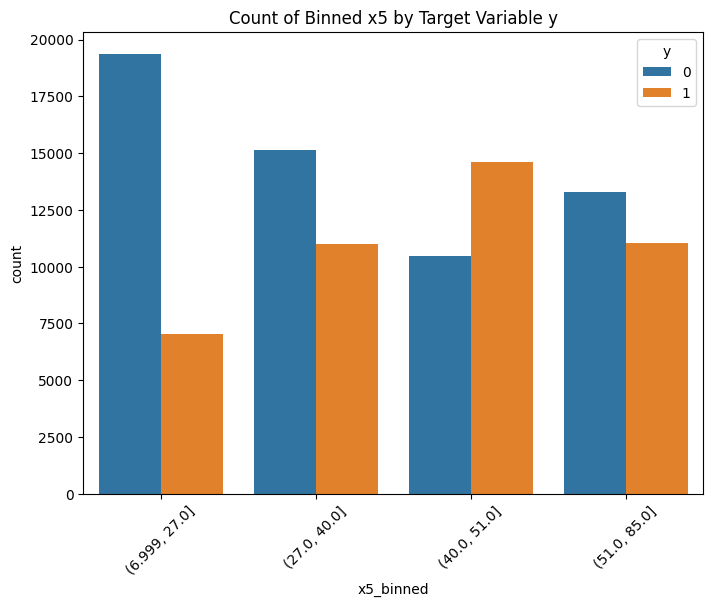

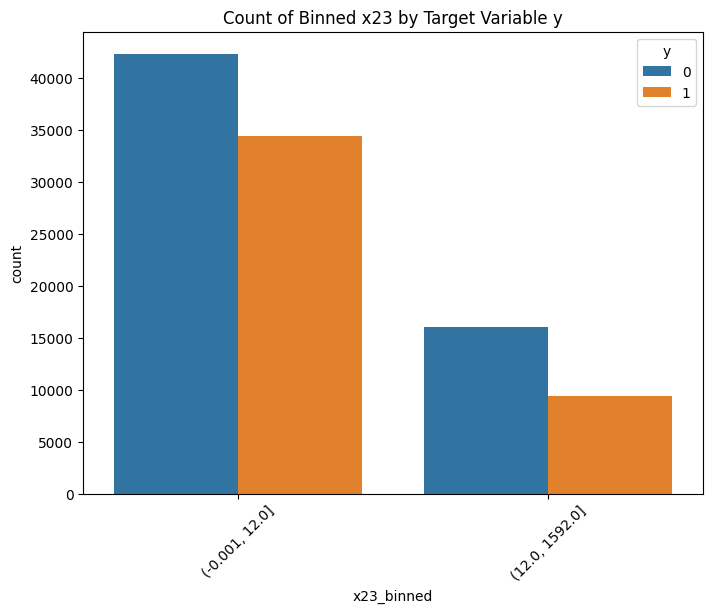

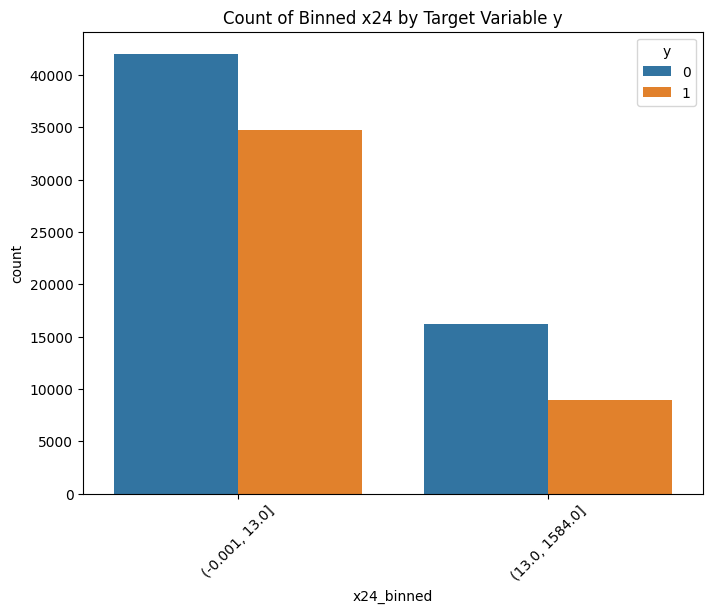

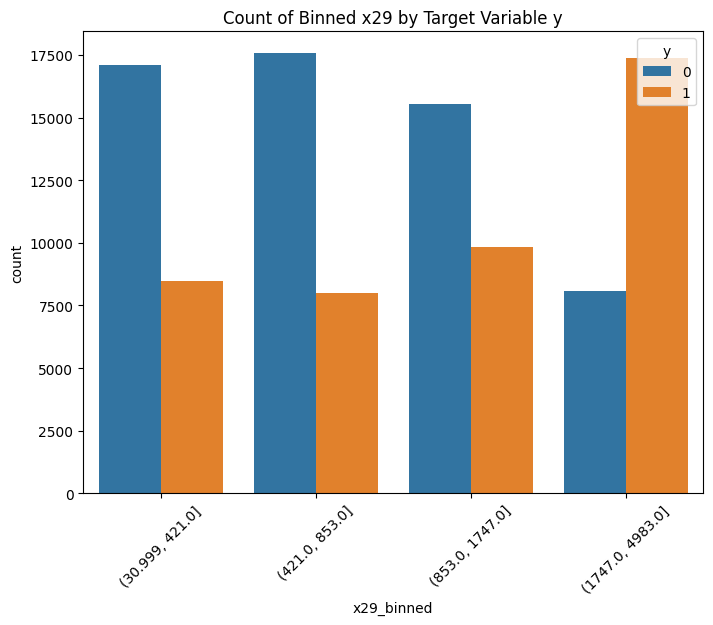

In [9]:
# bin the continuous variables and plot countplots
for col in continuous_cols:
    df[f'{col}_binned'] = pd.qcut(df[col], q=4, duplicates='drop')
    plt.figure(figsize=(8,6))
    sns.countplot(data=df, x=f'{col}_binned', hue='y')
    plt.title(f'Count of Binned {col} by Target Variable y')
    plt.xticks(rotation=45)
    plt.show()